In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.naive_bayes import BernoulliNB
plt.style.use('ggplot')

In [2]:
m = pd.read_csv('../datasets/mushrooms.csv')

In [3]:
m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
m.columns

Index([u'class', u'cap-shape', u'cap-surface', u'cap-color', u'bruises',
       u'odor', u'gill-attachment', u'gill-spacing', u'gill-size',
       u'gill-color', u'stalk-shape', u'stalk-root',
       u'stalk-surface-above-ring', u'stalk-surface-below-ring',
       u'stalk-color-above-ring', u'stalk-color-below-ring', u'veil-type',
       u'veil-color', u'ring-number', u'ring-type', u'spore-print-color',
       u'population', u'habitat'],
      dtype='object')

In [5]:
m = m.astype('category')

In [6]:
m.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [7]:
m.shape

(8124, 23)

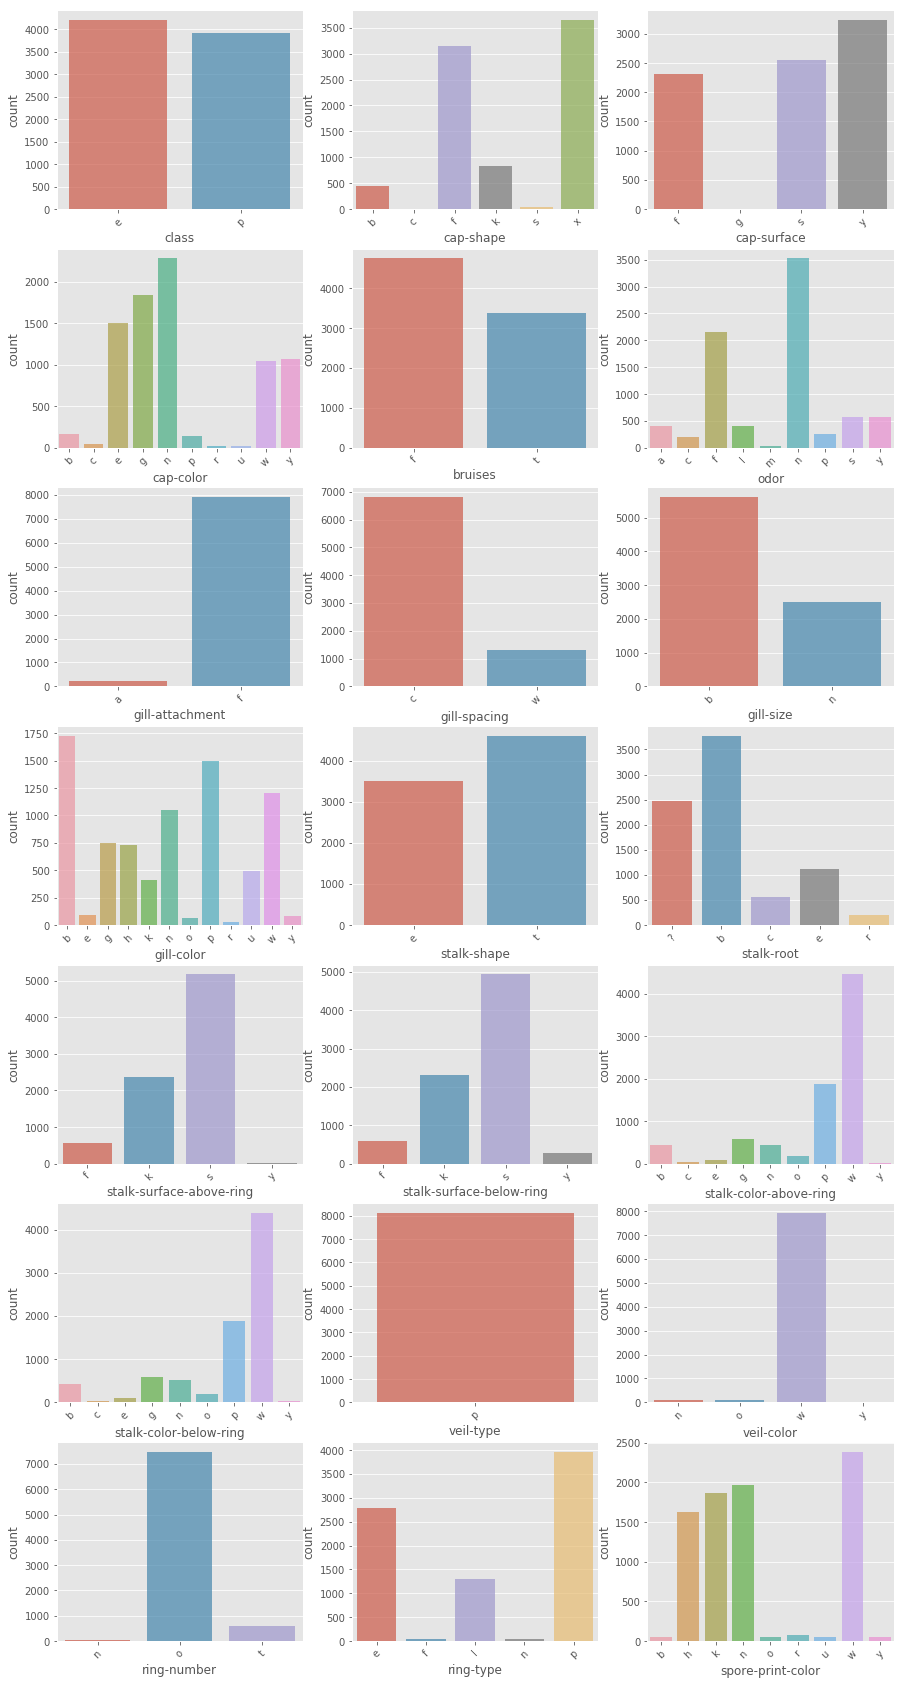

In [8]:
fig, axes = plt.subplots(nrows=int(round(len(m.columns) / 3)), ncols=3, figsize=(15,30))
for i, ax in enumerate(fig.axes):
    if i < len(m.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=m.columns[i], alpha=0.7, data=m, ax=ax)

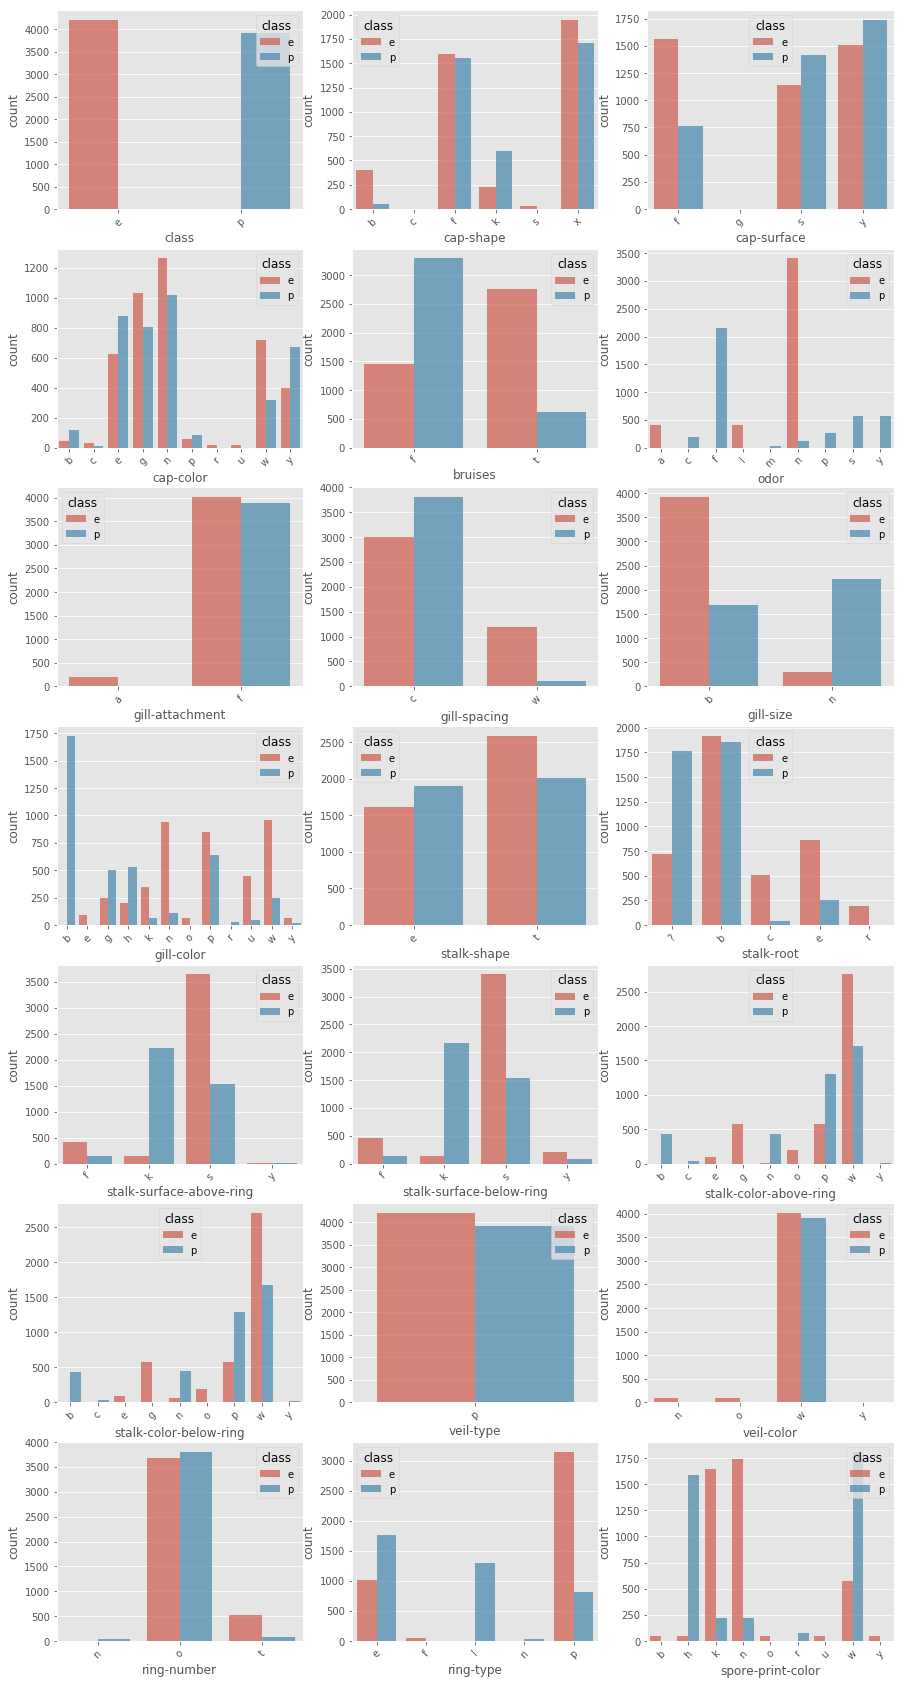

In [9]:
fig, axes = plt.subplots(nrows=int(round(len(m.columns) / 3)), ncols=3, figsize=(15,30))
for i, ax in enumerate(fig.axes):
    if i < len(m.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=m.columns[i], hue='class', alpha=0.7, data=m, ax=ax)

## Mushroom Classifier Experiments

In [13]:
m['class'] = m['class'].cat.codes

In [14]:
y = m['class']

In [18]:
X = pd.get_dummies(m.iloc[:, m.columns != 'class'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
clf = BernoulliNB()

In [23]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
y_pred = clf.predict(X_test)

In [33]:
missed = (y_pred != y_test).sum()

In [52]:
print("performance {:05.2f}%".format(100 * (1 - missed / float(y_test.shape[0]))))

performance 94.18%


In [41]:
missed

142

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [55]:
title = "Learning Curves (Naive Bayes)"

In [59]:
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

In [60]:
estimator = BernoulliNB()

<module 'matplotlib.pyplot' from '/Users/garrettransom/smart_machines/env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

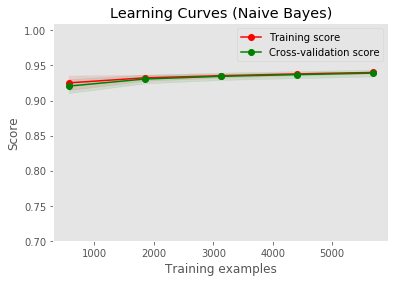

In [61]:
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)